## Multi-Dimensional Scaling (MDS)

In an earlier lesson, we learned how Principal Component Analysis (PCA) can detect patterns in our data. Remember, PCA is an *unsupervised* machine learning algorithm because it finds a natural structure present in our data, rather than trying to use our data to predict a given "right answer." We will now learn a new unsupervised machine learning method for discovering hidden relationships in our data. The multi-dimensional scaling (MDS) method can be used to map consumer perceptions of companies and brands, turning raw survey data into interpretable clusters that reveal market structure.

To understand how MDS works, we need to consider the challenges inherent in understanding consumer preferences. Suppose that we are a car company, like Ford or Toyota, and we need to understand why our competitors are selling more cars than we are. What questions should we ask? We could come up with a 100 question survey that compares all car brands across many different attributes, but there are two problems with this approach:

1. Consumers hate filling out long surveys
2. Even if we put 100 questions, we may still miss the real factors driving purchases.

The MDS method allows us to understand the factors that drive consumer behavior in our industry without needing to ask too many survey questions and *without having to know which factors are important in advance.* MDS works using the following beautifully simple process. Suppose we have the following list of car models, and we want to understand consumer opinion of these models:

In [1]:
car_models = [
    'cadillac cts',
    'dodge challenger',
    'ford mustang',
    'toyota camry',
    'hyundai elantra',
    'mercedes e class',
    'bmw 7 series',
    'lamborghini huracan'
]

Let's start with the car model 'cadillac cts'. Proceeding through the list of other car models, we assign a value from `0` (perfectly similar) to `10` (totally dissimilar) to every other car model. All of these values are stored in a list - for example, we might come up with the following list:

In [2]:
cadillac_cts_dissimilarity = [0,8,8,6,5,3,3,9]

We can see that the list above considers the cadillac cts to be perfectly similar to itself (required), very dissimilar to the dodge challenger, ford mustang, and lamborghini huracan, and relatively similar to the other entries. 

Consumers can then be asked to repeat this process for every model in the list. We will therefore end up with one row of numbers per model, and these rows can be arranged into a *dissimilarity matrix* like the one below:

In [3]:
import numpy as np
car_dissimilarity_matrix = np.array([
    [0,8,8,6,5,3,3,9],
    [8,0,1,5,5,8,8,9],
    [8,1,0,4,4,8,8,9],
    [6,5,4,0,2,5,5,10],
    [5,5,4,2,0,4,4,10],
    [3,8,8,5,4,0,1,8],
    [3,8,8,5,4,1,0,8],
    [9,9,9,10,10,8,8,0]
])

Let's visualize this dissimilarity matrix in order to make sense of these numbers:

In [4]:
import pandas as pd
pd.DataFrame(car_dissimilarity_matrix, index=car_models, columns=car_models)

,cadillac cts,dodge challenger,ford mustang,toyota camry,hyundai elantra,mercedes e class,bmw 7 series,lamborghini huracan
cadillac cts,0,8,8,6,5,3,3,9
dodge challenger,8,0,1,5,5,8,8,9
ford mustang,8,1,0,4,4,8,8,9
toyota camry,6,5,4,0,2,5,5,10
hyundai elantra,5,5,4,2,0,4,4,10
mercedes e class,3,8,8,5,4,0,1,8
bmw 7 series,3,8,8,5,4,1,0,8
lamborghini huracan,9,9,9,10,10,8,8,0


We can see that the numbers on the diagonal are always zero, meaning that every car is perfectly similar to itself. When you examine our different dissimilarity assignments, you may disagree with some of them. That is fine - these assignments measure the *subjective* perception of similarity/dissimilarity for each consumer that fills out the survey. In this case, they measure the subjective (and not very well informed) perception of the author of this lesson. It is your responsibility to ensure that your target consumer demographics are well represented in your survey population, in order for the perception data that you collect to have maximal business value.

Now that we have collected the data in our dissimilarity matrix, we can apply the MDS method to map out the structure of the market according to our consumer perceptions:

In [5]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity="precomputed",random_state=63)
perceptual_map = mds.fit_transform(car_dissimilarity_matrix)

Notice that we are again using the `sklearn` package, specifically the sub-module `manifold`. Let's break down these two lines:

1. We create a model object `mds`, using the keyword argument `dissimilarity="precomputed"` because we are going to pass in our dissimilarity matrix
2. We use the keyword argument `random_state=63` to ensure consistent results - sometimes the results can vary slightly due to the use of random numbers in various parts of the mathematical engine we use. 
3. Our `mds` model is then used to convert our dissimilarity matrix above into a `perceptual_map`, which can then be used to map consumer preferences.

Let's take a look at the `perceptual_map` that we generated in the above step:

In [6]:
perceptual_map

array([[ 0.83318563, -4.39990581],
       [-2.70086054,  3.8431003 ],
       [-3.15584783,  3.11368249],
       [-3.14692758, -0.71926201],
       [-1.90872518, -0.99941147],
       [ 1.82700045, -2.5804344 ],
       [ 2.15917615, -2.25192672],
       [ 6.09299892,  3.99415762]])

What do these numbers mean? Each row corresponds to one car model, and the two columns represent $x$ and $y$ coordinates. We can therefore make a 2D scatter plot (using matplotlib's `annotate` function to draw each point with a label) to map the structure of the market:

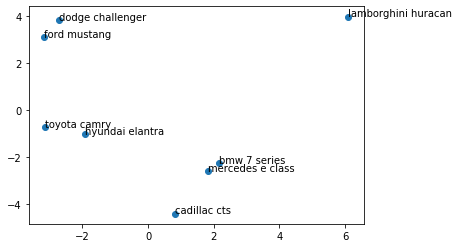

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

x = perceptual_map[:,0]
y = perceptual_map[:,1]
plt.scatter(x, y)
for i in range(0, len(car_models)):
    txt = car_models[i]
    plt.annotate(txt, [x[i], y[i]])
plt.show()

The MDS procedure has taken the information that we provided about our perceived *distances* between brands/models and constructed a graph that attempts to visualize those distances in two dimensions. In the process, it has revealed a pattern in our data - we can now see that the consumer has grouped certain models close together, while other models are far apart. 

What are the meanings of these groups of points? On what basis do consumers consider the "dodge challenger" and the "ford mustang" to be very similar to each other, but very different than the "lamborghini huracan?" MDS has identified two dimensions ($x$ and $y$) that the consumer is using subconsciously to map the structure of the car market, but we must use our human intuition to understand what these dimensions *mean*. A plausible theory is that the $x$ dimension corresponds to *luxury*, while the $y$ dimension corresponds to *performance.* Thus, muscle cars are high luxury/low performance, while luxury sedans are high luxury/lower performance, and the lamborghini supercar is high on both measures.

### The Power of MDS

Note the following key takeaway - we did not need to ask consumers any actual questions about the luxury or performance of cars! Had we decided to do so, we might have come up with a highly tedious list of questions asking about items like: 

1. Leather seats
2. Sound system
3. Acceleration 
4. Top Speed

and a very long list of other possibilities. Instead, the MDS method has surfaced both the *existence* of the luxury and performance axes *and how different brands score on those metrics*. This illustrates the power of this technique.

<span style="color:blue;font-weight:bold">Exercise</span>: Build Your Own MDS Dataset:

1. Prepare your own 8x8 disimmilarity matrix comparing eight different products or companies from an industry of your choice. Your dissimilarity matrix must satisfy the following conditions:

    * It must be stored in a variable called `my_dissimilarity_matrix` of type `np.array`
    * All diagonal elements must be zero
    * All off-diagonal elements must be non-zero
    * It cannot exactly match the dissimilarity matrix given above - don't cheat! 


2. Run MDS to produce a 2-dimensional perceptual map - store this result in the variable `my_perceptual_map`. 

3. As we did above, produce a graph of the perceptual map and label the points. 

In [16]:
# delete this entire line and replace it with your code
my_dissimilarity_matrix = np.array([
    [0, 1,  3,  4,  5,  7,  8, 10],
    [1, 0,  1,  2,  2,  10, 5, 5],
    [3, 1,  0,  4,  5,  7,  8, 10],
    [4, 2,  4,  0,  5,  7,  8, 10],
    [5, 2,  5,  5,  0,  7,  8, 10],
    [7, 10, 7,  7,  7,  0,  8, 10],
    [8, 5,  8,  8,  8,  8,  0, 10],
    [10, 5, 10, 10, 10, 10,  10, 0]
    
])

mds = MDS(dissimilarity="precomputed",random_state=63)
my_perceptual_map = mds.fit_transform(my_dissimilarity_matrix)

In [16]:
assert not np.array_equal(my_dissimilarity_matrix, [
    [0,8,8,6,5,3,3,9],
    [8,0,1,5,5,8,8,9],
    [8,1,0,4,4,8,8,9],
    [6,5,4,0,2,5,5,10],
    [5,5,4,2,0,4,4,10],
    [3,8,8,5,4,0,1,8],
    [3,8,8,5,4,1,0,8],
    [9,9,9,10,10,8,8,0]
]), "No re-using our dissimilarity matrix!"
assert my_dissimilarity_matrix.shape == (8,8), "Your dissimilarity matrix has the wrong shape - should be <code>(8,8)</code>"
for i in range(len(my_dissimilarity_matrix)):
    for j in range(len(my_dissimilarity_matrix)):
        if i == j:
            assert my_dissimilarity_matrix[i,j] == 0, "At least one of the diagonal elements in your dissimilarity matrix is non-zero - this is incorrect."
        else:
            assert my_dissimilarity_matrix[i,j] != 0, "All off-diagonal elements of your dissimilarity matrix should be non-zero"
assert my_perceptual_map.shape == (8,2)
success()

In [20]:
my_perceptual_map

array([[ 1.96848717,  1.41593532],
       [ 1.73509224, -0.27252772],
       [ 3.18519703,  1.2421097 ],
       [ 1.20891893,  3.60204022],
       [-0.98437256,  0.77891855],
       [-5.2013366 ,  3.59683902],
       [-4.55880708, -3.29064701],
       [ 2.64682088, -7.07266809]])

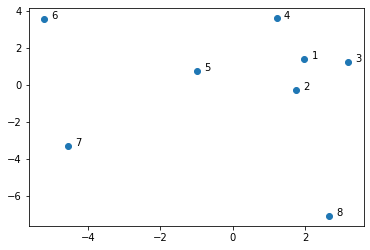

In [24]:
plt.scatter(my_perceptual_map[:,0], my_perceptual_map[:,1])
for i in range(8):
    txt = str(i+1)
    plt.annotate(txt, [my_perceptual_map[:,0][i] + 0.2, my_perceptual_map[:,1][i]])
plt.show()